# Fracture Stage Classification in Oil & Gas Drilling Operations

### Objectives
* Classify different Fracture Stages
* Evaluate Different Classification models accuracy
* Determine the best performing Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_excel("Fracability_DataSet.xlsx")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MD_ft,1000.0,14000.000000,4269.740397,2571.139190,10943.676726,13864.280896,17149.039581,25382.097071
Resistivity,1000.0,500.000000,179.604705,-2.624400,364.746085,497.077253,620.324542,970.103975
YM/PR,1000.0,24.000000,8.388762,4.917917,17.708133,23.399724,29.588017,49.567271
GR,1000.0,300.000000,122.443017,-2.296323,210.515488,302.737171,387.137024,627.305824
Minimum Horizontal Stress Gradient,1000.0,0.926601,0.234990,0.292125,0.747472,0.932445,1.106538,1.508552
Fracability,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [3]:
df.columns

Index(['MD_ft', 'Resistivity', 'YM/PR', 'GR',
       'Minimum Horizontal Stress Gradient', 'Fracability'],
      dtype='object')

## Exploratory Data Analysis

C:\Users\youse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\youse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\youse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Minimum Horizontal Stress Gradient', ylabel='Density'>

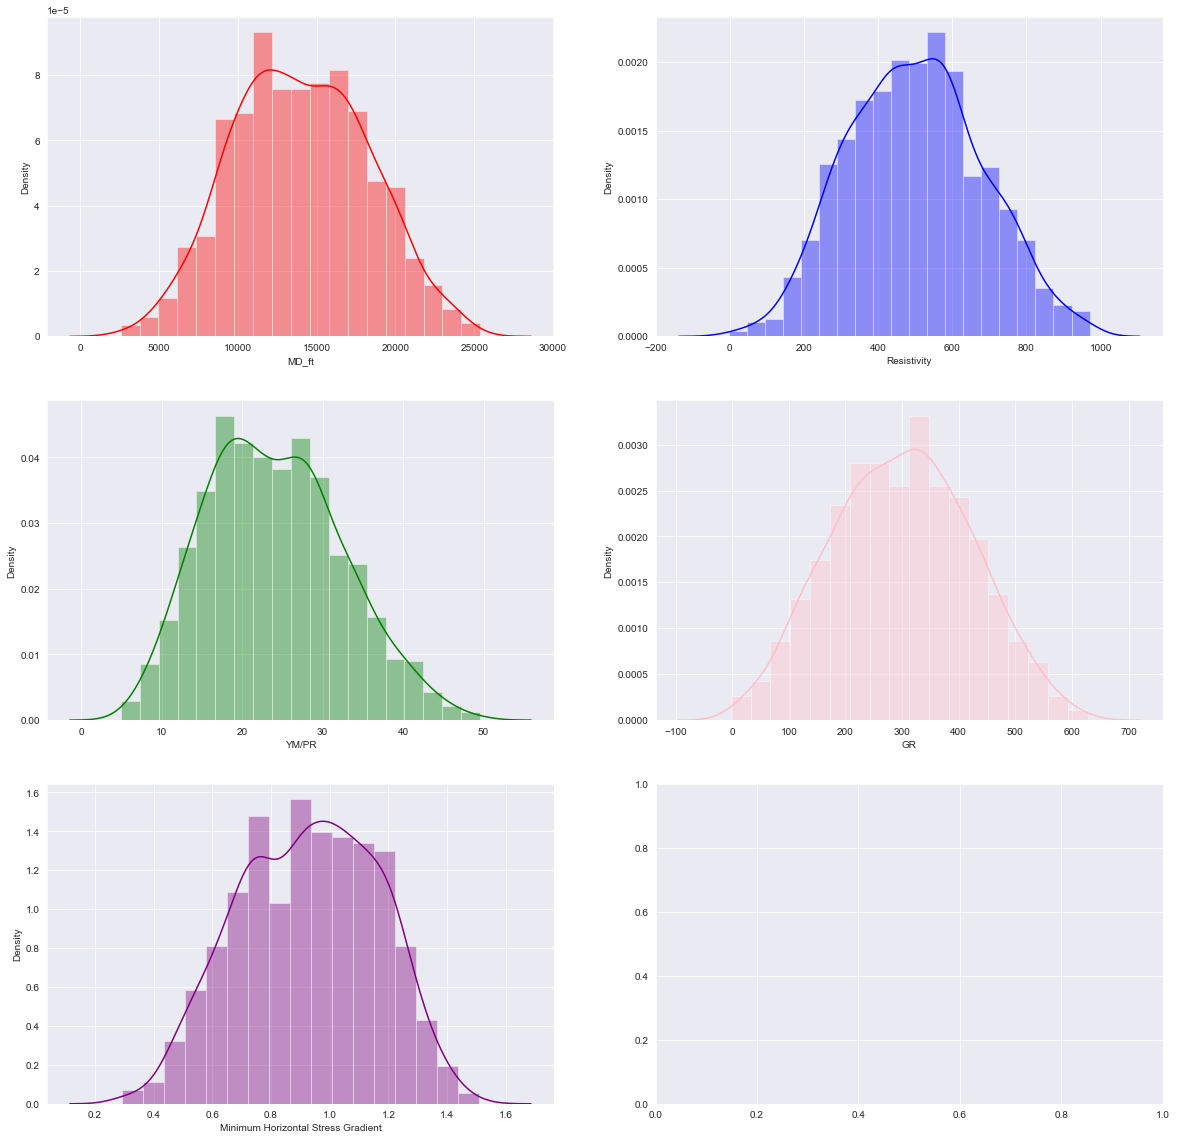

In [4]:
# Checking the Normality of the features

_, axes = plt.subplots(3, 2, figsize = (20,20))
sns.distplot(df.MD_ft, color = 'red', ax = axes[0, 0])
sns.distplot(df.Resistivity, color = 'blue', ax = axes[0, 1])
sns.distplot(df['YM/PR'], color = 'green', ax = axes[1, 0])
sns.distplot(df.GR, color = 'pink', ax = axes[1, 1])
sns.distplot(df['Minimum Horizontal Stress Gradient'], color = 'purple', ax = axes[2, 0])

C:\Users\youse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\youse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\youse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\youse\anaconda3\lib\si

<AxesSubplot:xlabel='Minimum Horizontal Stress Gradient'>

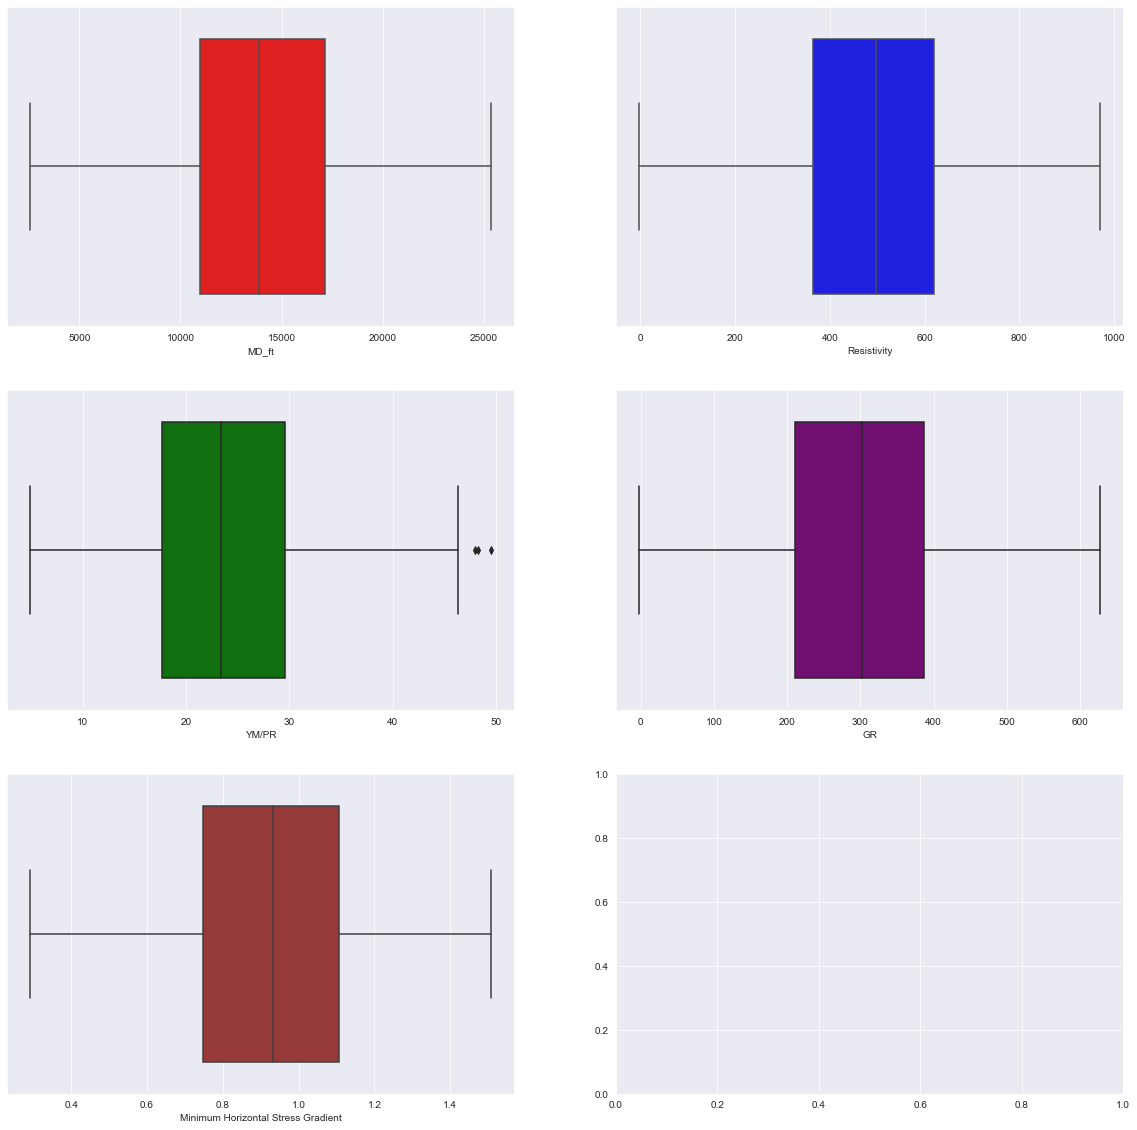

In [5]:
_, ax = plt.subplots(3, 2, figsize = (20, 20))
sns.boxplot(df['MD_ft'], color = 'red', ax = ax[0, 0])
sns.boxplot(df['Resistivity'], color = 'blue', ax = ax[0, 1])
sns.boxplot(df['YM/PR'], color = 'green', ax = ax[1, 0])
sns.boxplot(df['GR'], color = 'purple', ax = ax[1, 1])
sns.boxplot(df['Minimum Horizontal Stress Gradient'], color = 'brown', ax = ax[2, 0])


In [6]:
# Ensuring that we dont have any string features
df.dtypes.value_counts()

float64    5
int64      1
dtype: int64

In [7]:
features = df.columns
features[1]

'Resistivity'

In [8]:
len(df.Fracability.unique())

2

In [9]:
# Checking for categorical features
features = df.columns
for feature in features:
    if len(df[feature].unique()) <= 6:
        print(df[feature])

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: Fracability, Length: 1000, dtype: int64


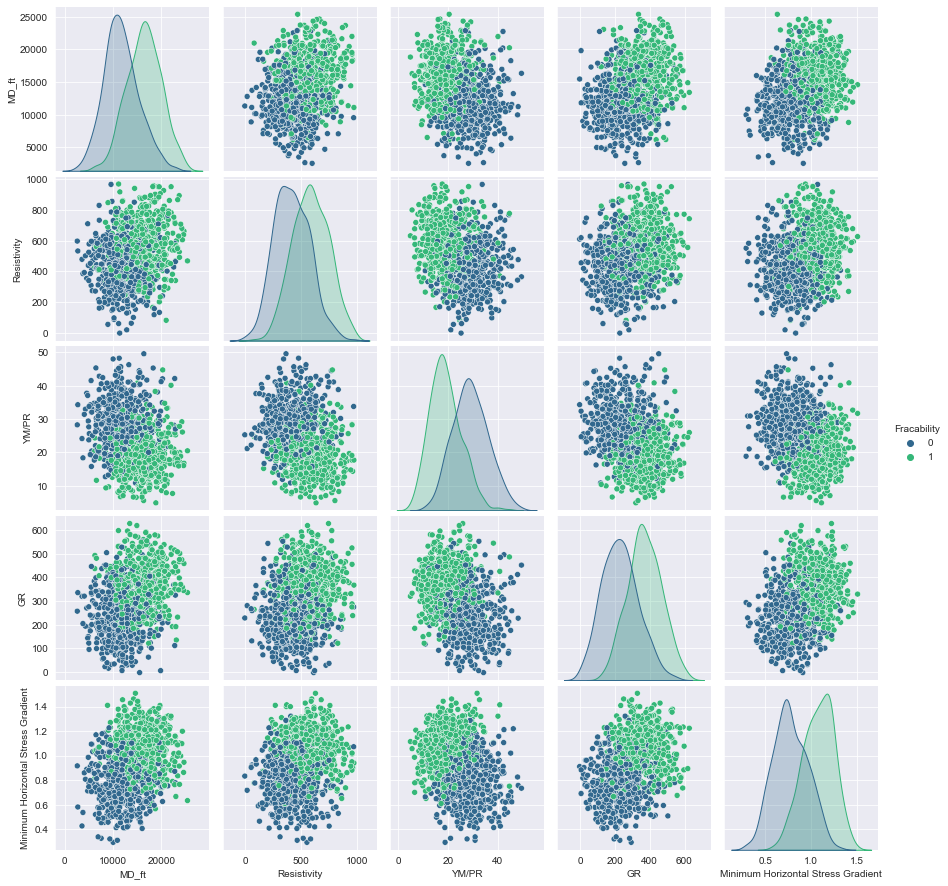

In [10]:
sns.pairplot(df, hue='Fracability', palette="viridis")

## Scaling the Features

In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
y = df['Fracability']
x = df.drop(['Fracability'], axis = 1)
x_scaled = scaler.fit(x)
x_scaled = scaler.transform(x)

In [12]:
seed = 50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3)

## Support Vector Machines Classification Model

In [13]:
from sklearn import svm
np.random.seed(seed)
svm = svm.SVC(C=1, kernel='rbf', degree = 3, gamma=1, tol=0.001)
svm.fit(X_train, y_train)

SVC(C=1, gamma=1)

Accuracy Score: 0.9366666666666666
Confusion Matrix:
[[138  14]
 [  5 143]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       152
           1       0.91      0.97      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



<AxesSubplot:>

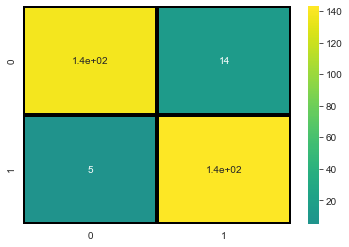

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center = True, annot = True, cmap = 'viridis', linewidths=3, linecolor='black')

In [15]:
from sklearn.model_selection import cross_val_score
np.random.seed(seed)
scores = cross_val_score(svm, x_scaled, y, cv=10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))

Cross-validation scores: [0.94 0.93 0.93 0.93 0.9  0.95 0.92 0.95 0.97 0.97]
Average cross-validation score: 0.9390000000000003


## Random Forest Classification Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(seed)
rf = RandomForestClassifier(n_estimators = 5000, criterion='gini', max_depth = None, min_samples_split=2, min_samples_leaf=5, max_features='auto')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

#### Accuracy and Confusion Matrix in Random Forest Classification Model

Accuracy Score: 0.9366666666666666
Confusion Matrix:
[[139  13]
 [  6 142]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       152
           1       0.92      0.96      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



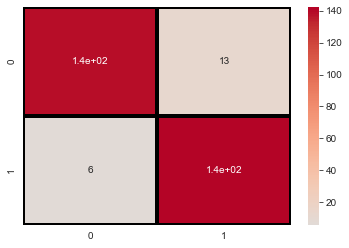

In [17]:
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center = True, annot = True, cmap = 'coolwarm', linewidths=3, linecolor='black')
plt.show()

#### Feature Importance in Random Forest Classification Model

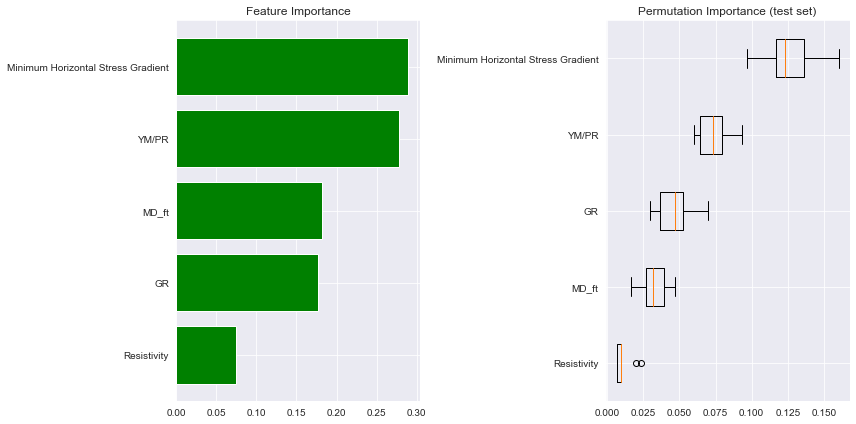

In [18]:
from sklearn.inspection import permutation_importance
feature_importance = rf.feature_importances_
sorted_features = np.argsort(feature_importance)
pos=np.arange(sorted_features.shape[0]) + .5

fig = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], color = 'green')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result=permutation_importance(rf, X_test, y_test,n_repeats=10,random_state=seed)
sorted_idx=result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False,
labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

#### Average 10-Fold-Cross Validation Accuracy in Random Forest Classification

In [19]:
np.random.seed(seed)
scores = cross_val_score(rf, x_scaled, y, cv=10, scoring='accuracy')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))

Cross-validation scores: [0.94 0.93 0.92 0.91 0.91 0.95 0.92 0.93 0.93 0.95]
Average cross-validation score: 0.9289999999999999


## Extra Trees Classification Model

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(seed)
et = ExtraTreesClassifier(n_estimators = 5000, criterion = 'gini', max_depth=None, min_samples_split=2, min_samples_leaf=5, max_features='auto')
et.fit(X_train, y_train)
y_pred = et.predict(X_test)


#### Accuracy & Confusion Matrix of Extra Tree Classification Model

Accuracy Score: 0.9333333333333333
Confusion Matrix: 
[[137  15]
 [  5 143]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       152
           1       0.91      0.97      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



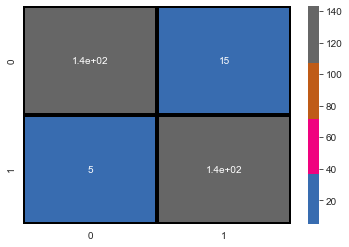

In [21]:
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
print(cm)
print(classification_report(y_test, y_pred))

sns.heatmap(cm, center=True, annot=True, cmap='Accent', linewidths=3, linecolor='black')
plt.show()

#### Feature Importance in Extra Tree Classification Model

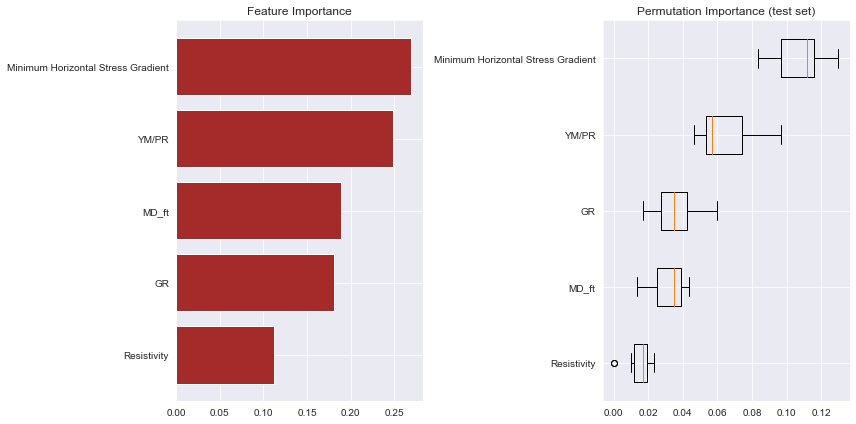

In [22]:
from sklearn.inspection import permutation_importance
feature_importance = et.feature_importances_
sorted_features = np.argsort(feature_importance)

pos = np.arange(sorted_features.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='brown')

plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')
result = permutation_importance(et, X_test, y_test, n_repeats=10, random_state=seed)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert = False, labels = np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

#### Average 10-Fold-Cross Validation Accuracy in Extra Tree Classification

In [23]:
np.random.seed(seed)
scores = cross_val_score(et, x_scaled, y, cv=10, scoring = 'accuracy')
print("Cross-validation score: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))

Cross-validation score: [0.94 0.92 0.91 0.92 0.9  0.94 0.93 0.93 0.93 0.97]
Average cross-validation score: 0.929


## Gradient Boosting Classification Model

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(seed)
gb = GradientBoostingClassifier(loss = 'deviance', learning_rate=0.1, n_estimators = 2000, criterion = 'friedman_mse',
                               min_samples_split=2, min_samples_leaf=1, max_depth=3, max_features=None)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

#### Accuracy & Confusion Matrix of Gradient Boosting Classification Model

Accuracy Score: 0.9266666666666666
Confusion Matrix: 
[[137  15]
 [  7 141]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       152
           1       0.90      0.95      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



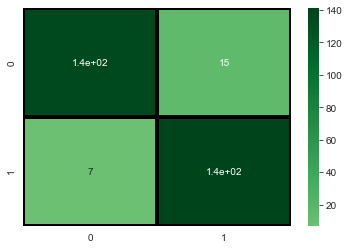

In [25]:
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center = True, annot = True, cmap = 'Greens',
           linewidths = 3, linecolor = 'black')
plt.show()

#### Feature Importance in Gradient Boosting Classification Model


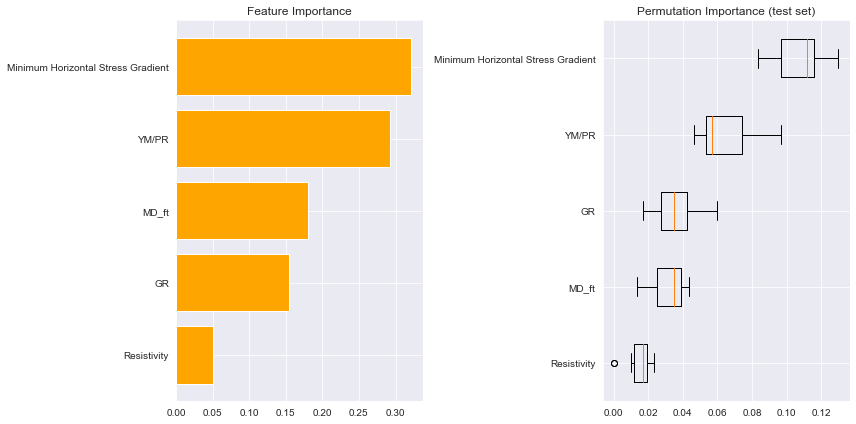

In [26]:
from sklearn.inspection import permutation_importance
feature_importance = gb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0])+ .5

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='orange')

plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')
result = permutation_importance(et, X_test, y_test, n_repeats=10, random_state=seed)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert = False, labels = np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

#### Average 10-Fold-Cross Validation Accuracy in Gradient Boosting 

In [27]:
np.random.seed(seed)
scores = cross_val_score(gb, x_scaled, y, cv=10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))

Cross-validation scores: [0.96 0.89 0.9  0.91 0.89 0.92 0.9  0.94 0.96 0.95]
Average cross-validation score: 0.9219999999999999


## XGBoost Classification Model

In [29]:
from xgboost import XGBClassifier
np.random.seed(seed)
xgb=XGBClassifier(objective='binary:logistic', n_estimators=5000, reg_lambda=1, gamma=0, max_depth=3, learning_rate=0.1, alpha=0.5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

C:\Users\youse\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:13:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Accuracy and Confusion Matrix of XGBoost Classification Model

Accuracy Score: 0.9266666666666666
Confusion Matrix:
[[135  17]
 [  5 143]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       152
           1       0.89      0.97      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



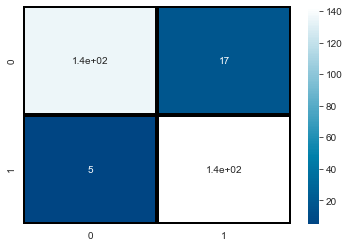

In [30]:
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center = True, annot = True, cmap = 'ocean', linewidths = 3, linecolor = 'black')
plt.show()

#### Feature Importance in XGBoost Classification Model


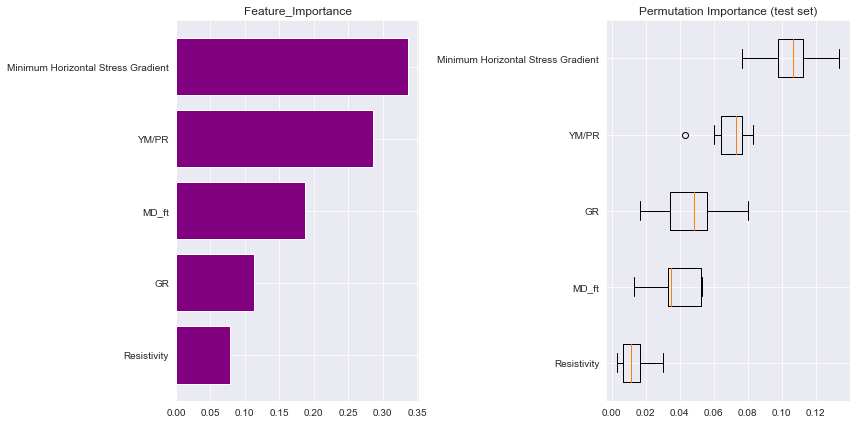

In [32]:
from sklearn.inspection import permutation_importance
feature_importance = xgb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5

fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='purple')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature_Importance')
result = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=seed)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1,2,2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels = np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

#### Average 10-Fold-Cross Validation Accuracy in XGBoost Model

In [33]:
np.random.seed(seed)
scores = cross_val_score(xgb, x_scaled, y, cv=10, scoring='accuracy')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))

C:\Users\youse\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:20:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### The best performing Model is the SVM Model achieving the highest accuracy, more features can allow for better and more confident predictions